<a href="https://colab.research.google.com/github/matheustoneti/MachinePredictiveMaintenanceClassification/blob/main/Machine_Predictive_Maintenance_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

data import

In [189]:
data = pd.read_csv('predictive_maintenance.csv')

In [190]:
data.head(100)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
95,96,M14955,M,299.0,309.0,1351,52.2,44,0,No Failure
96,97,M14956,M,299.0,309.0,1575,35.3,47,0,No Failure
97,98,M14957,M,298.9,308.9,1750,29.9,50,0,No Failure
98,99,L47278,L,298.9,308.8,1529,32.7,53,0,No Failure


Data cleaning

In [191]:

data = data.drop(['Product ID'], axis=1)
data = data.dropna()

Data Exploration

In [192]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Type                     10000 non-null  object 
 2   Air temperature [K]      10000 non-null  float64
 3   Process temperature [K]  10000 non-null  float64
 4   Rotational speed [rpm]   10000 non-null  int64  
 5   Torque [Nm]              10000 non-null  float64
 6   Tool wear [min]          10000 non-null  int64  
 7   Target                   10000 non-null  int64  
 8   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(2)
memory usage: 703.3+ KB


In [193]:
dataF = (data['Target'] == 1).sum()
dataN = (data['Target'] == 0).sum()
total = dataN + dataF
print(f"{dataF} ({100*dataF/total:.2f}%) of the total machine failure in the dataset")
print(f"{dataN} ({100*dataN/total:.2f}%) of total machine working in the dataset")

339 (3.39%) of the total machine failure in the dataset
9661 (96.61%) of total machine working in the dataset


In [194]:
# Get unique values in the "Failure Type" column
unique_failure_types = data['Failure Type'].unique()

print(unique_failure_types)


['No Failure' 'Power Failure' 'Tool Wear Failure' 'Overstrain Failure'
 'Random Failures' 'Heat Dissipation Failure']


In [195]:
data


,UDI,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...
9995,9996,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H,299.0,308.7,1408,48.5,25,0,No Failure


In [196]:


# Creating the new column
#data['is_failure'] = data['Failure Type'].apply(lambda x: 0 if x == 'No Failure' else 1)

 
# Convert "Failure Type" column to one-hot encoded columns
#df_one_hot = pd.get_dummies(data['Failure Type'], prefix='Type')

# Concatenate the one-hot encoded columns back to the original DataFrame (optional)
#data = pd.concat([data, df_one_hot], axis=1)

# Drop the original "Failure Type" column (optional)
#data.drop('Failure Type', axis=1, inplace=True)


In [197]:
data


,UDI,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...
9995,9996,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H,299.0,308.7,1408,48.5,25,0,No Failure


In [198]:
# Convert "Failure Type" column to one-hot encoded columns
df_one_hot = pd.get_dummies(data['Type'], prefix='Type_')

# Concatenate the one-hot encoded columns back to the original DataFrame (optional)
data = pd.concat([data, df_one_hot], axis=1)

# Drop the original "Failure Type" column (optional)
data.drop('Type', axis=1, inplace=True)

In [199]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  int64  
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  int64  
 6   Target                   10000 non-null  int64  
 7   Failure Type             10000 non-null  object 
 8   Type__H                  10000 non-null  uint8  
 9   Type__L                  10000 non-null  uint8  
 10  Type__M                  10000 non-null  uint8  
dtypes: float64(3), int64(4), object(1), uint8(3)
memory usage: 654.4+ KB


/tmp/ipykernel_49280/1482649061.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


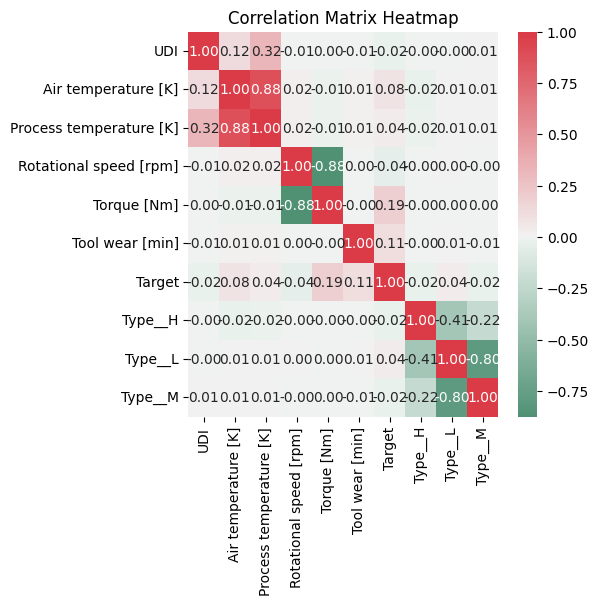

In [200]:
df = pd.DataFrame(data)
#df.drop('Failure Type', axis=1, inplace=True)

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a figure and axes with a specific size
fig, ax = plt.subplots(figsize=(5, 5))

# Create a custom colormap from green (low correlation) to red (high correlation)
cmap = sns.diverging_palette(150, 10, as_cmap=True)

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap=cmap, center=0, ax=ax)

# Set the title
ax.set_title('Correlation Matrix Heatmap')

# Show the plot
plt.show()

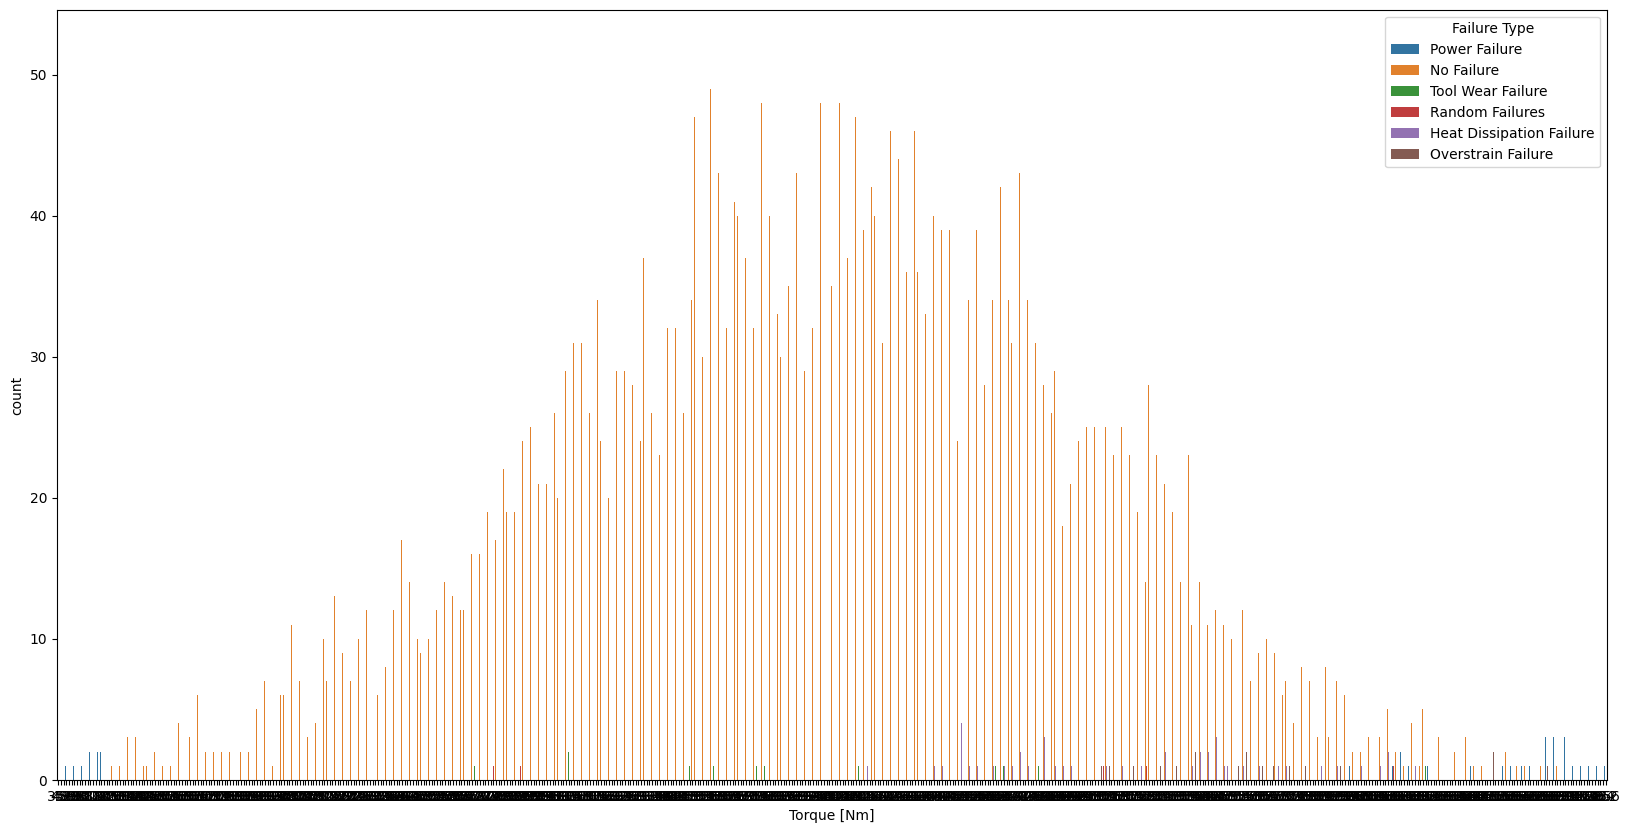

In [201]:
axe, fig = plt.subplots(figsize = (20,10))
axe = sns.countplot(x= data['Torque [Nm]'], hue = data['Failure Type'])

In [202]:
data_pair_plot = data[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Failure Type']]

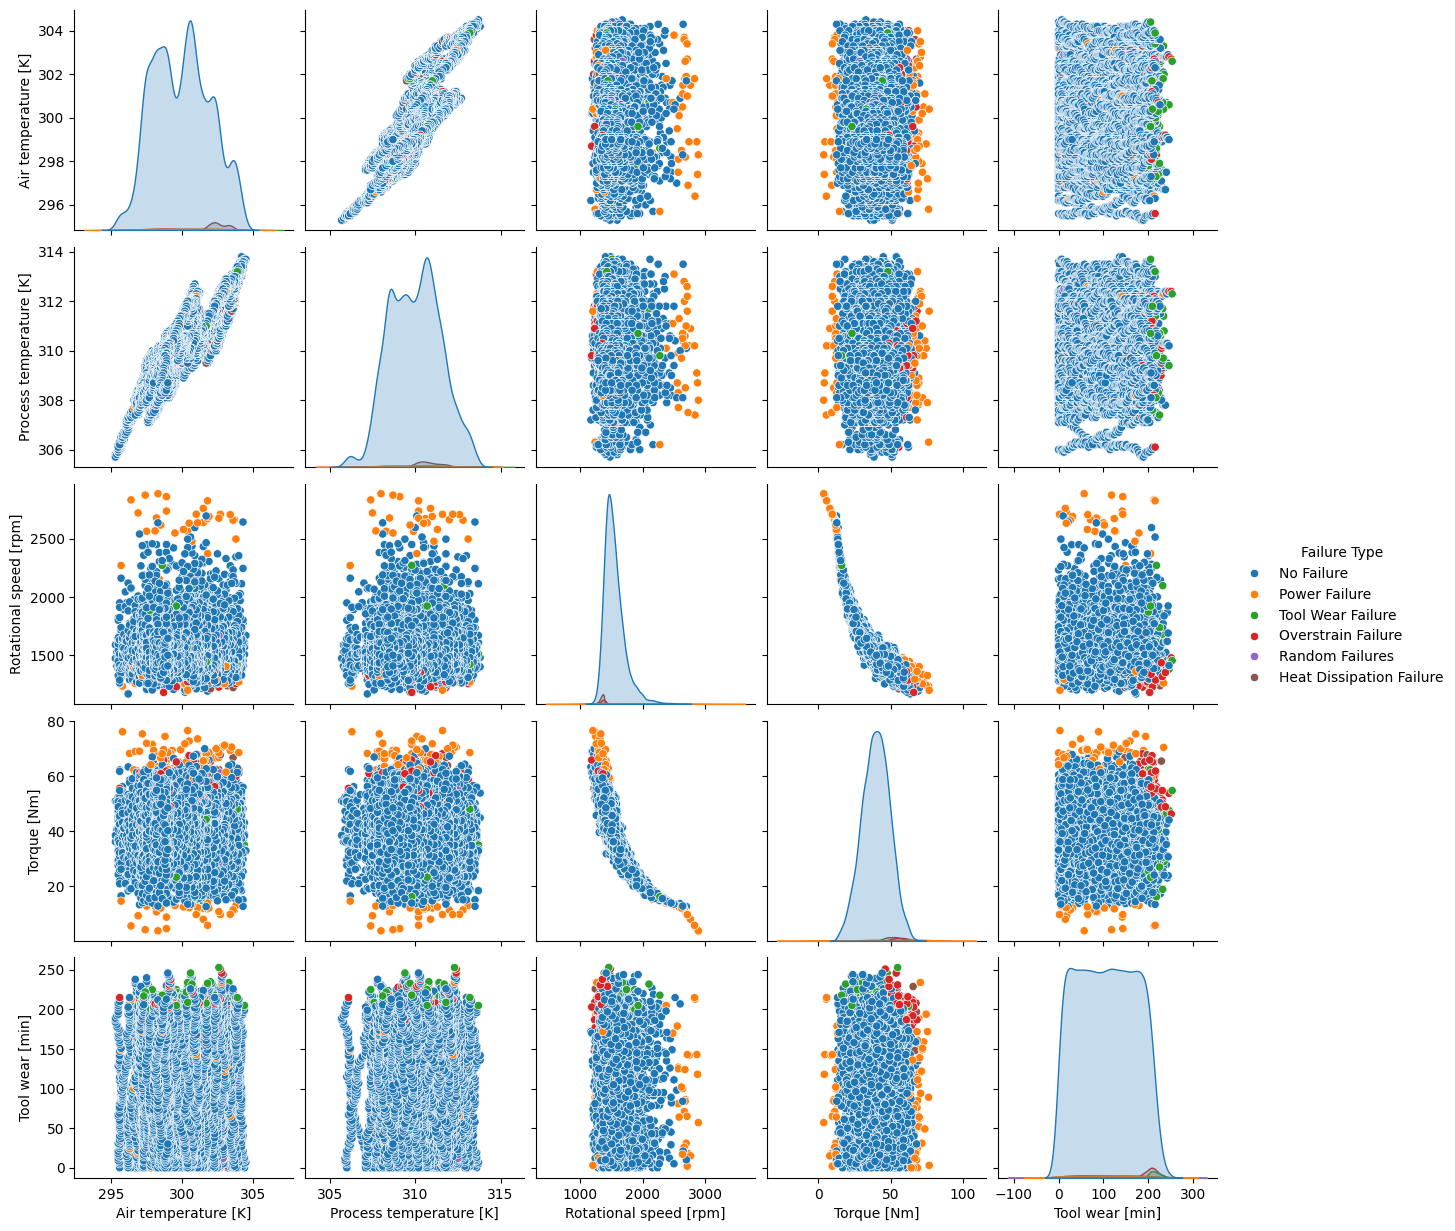

In [203]:
sns.pairplot(data = data_pair_plot, hue = 'Failure Type')

In [204]:
le = preprocessing.LabelEncoder()
# data['Type'] = le.fit_transform(data['Type'])
#data['Failure Type'] = le.fit_transform(data['Failure Type'])
unique_failure_types = data['Failure Type'].unique()

print(unique_failure_types)

['No Failure' 'Power Failure' 'Tool Wear Failure' 'Overstrain Failure'
 'Random Failures' 'Heat Dissipation Failure']


In [205]:
#data.head(50)# Assuming df is your DataFrame
print(data.dtypes)

UDI                          int64
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Target                       int64
Failure Type                object
Type__H                      uint8
Type__L                      uint8
Type__M                      uint8
dtype: object


In [206]:
import json
# Sample the data
sampled_data = pd.DataFrame()

# Sample 3 from '1'
sampled_1 = data[data['Failure Type'] == 'No Failure'].sample(n=3, random_state=1)
sampled_data = pd.concat([sampled_data, sampled_1])

# Sample 1 from each of [0, 2, 3, 4, 5]
for failure_type in ['Power Failure','Tool Wear Failure','Overstrain Failure','Random Failures','Heat Dissipation Failure']:
    sampled_type = data[data['Failure Type'] == failure_type].sample(n=1, random_state=1)
    sampled_data = pd.concat([sampled_data, sampled_type])

# Save to JSON
sampled_json = sampled_data.to_dict(orient='records')
with open('sampled_data.json', 'w') as f:
    json.dump(sampled_json, f, indent=4)

data = data.drop(sampled_data.index)


In [207]:

# le = preprocessing.LabelEncoder()
# data['Type'] = le.fit_transform(data['Type'])
# data['Failure Type'] = le.fit_transform(data['Failure Type'])
#data = data.drop(["Failure Type"], axis=1)
data['is_Failure'] = data['Failure Type'].apply(lambda x: 0 if x == "No Failure" else 1)
data =  data.drop(columns=["Target","Failure Type","UDI"])
data


,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Type__H,Type__L,Type__M,is_Failure
0,298.1,308.6,1551,42.8,0,0,0,1,0
1,298.2,308.7,1408,46.3,3,0,1,0,0
2,298.1,308.5,1498,49.4,5,0,1,0,0
3,298.2,308.6,1433,39.5,7,0,1,0,0
4,298.2,308.7,1408,40.0,9,0,1,0,0
...,...,...,...,...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14,0,0,1,0
9996,298.9,308.4,1632,31.8,17,1,0,0,0
9997,299.0,308.6,1645,33.4,22,0,0,1,0
9998,299.0,308.7,1408,48.5,25,1,0,0,0


In [208]:
dataF = (data['is_Failure'] == 1).sum()
dataN = (data['is_Failure'] == 0).sum()
total = dataN + dataF
print(f"{dataF} ({100*dataF/total:.2f}%) of the total machine failure in the dataset")
print(f"{dataN} ({100*dataN/total:.2f}%) of total machine working in the dataset")

343 (3.43%) of the total machine failure in the dataset
9649 (96.57%) of total machine working in the dataset


In [209]:
y = data['is_Failure']
x = data.drop(['is_Failure'], axis = 1)

In [210]:
x.head(10)


,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Type__H,Type__L,Type__M
0,298.1,308.6,1551,42.8,0,0,0,1
1,298.2,308.7,1408,46.3,3,0,1,0
2,298.1,308.5,1498,49.4,5,0,1,0
3,298.2,308.6,1433,39.5,7,0,1,0
4,298.2,308.7,1408,40.0,9,0,1,0
5,298.1,308.6,1425,41.9,11,0,0,1
6,298.1,308.6,1558,42.4,14,0,1,0
7,298.1,308.6,1527,40.2,16,0,1,0
8,298.3,308.7,1667,28.6,18,0,0,1
9,298.5,309.0,1741,28.0,21,0,0,1


In [211]:
import numpy as np

def calculate_CM_score(confusion_matrix):
    alpha=1 
    beta=3
    # Convert the confusion matrix to a numpy array for easier indexing
    cm = np.array(confusion_matrix)
    
    # TN (True Negatives): Actual Working and Predicted Working
    # TP (True Positives): Actual Failure and Predicted Failure
    # FP (False Positives): Actual Working and Predicted Failure
    # FN (False Negatives): Actual Failure and Predicted Working
    
    # Extract TN, FP, FN, TP
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TP = cm[1, 1]
    
    # Calculate the score
    numerator = TN + TP
    denominator = TN + TP + alpha * FP + beta * FN
    score = numerator / denominator
    
    # Print the score
    print(f"confusion matrix score: {score:.4f}")
    return score


In [212]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = (0.3))
model_scores=[]

Gradient Boosting Classifier

accuracy: 0.9359573048699132
confusion matrix score: 0.9273


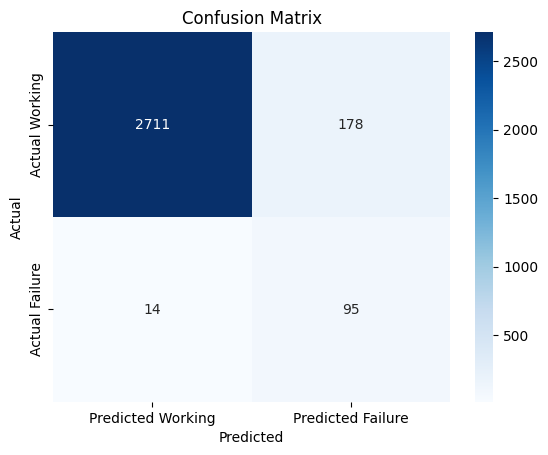

In [213]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.class_weight import compute_sample_weight
# Compute sample weights
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

# Train the model with the computed sample weights
GradientBoostingClassifierModelWITHWeightAdjustment = GradientBoostingClassifier()
GradientBoostingClassifierModelWITHWeightAdjustment.fit(x_train, y_train, sample_weight=sample_weights)
accuracy = GradientBoostingClassifierModelWITHWeightAdjustment.score(x_test, y_test)


# Make predictions on the test set
y_pred = GradientBoostingClassifierModelWITHWeightAdjustment.predict(x_test)

print(f"accuracy: {accuracy}")
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

cm_score = calculate_CM_score(cm)
model_scores.append(["Gradient Boosting Classifier.", cm_score])

# Visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Working', 'Predicted Failure'], yticklabels=['Actual Working', 'Actual Failure'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [214]:

#import pickle

# Save model
#with open('modelo_gradient_boosting.pkl', 'wb') as f:
#    pickle.dump(modelo, f)
    
#import sys
#print(sys.executable)    

RandomForestClassifier

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2889
           1       0.95      0.39      0.55       109

    accuracy                           0.98      2998
   macro avg       0.97      0.69      0.77      2998
weighted avg       0.98      0.98      0.97      2998

ROC-AUC Score: 0.9539
Precision-Recall AUC Score: 0.7647
confusion matrix score: 0.9352


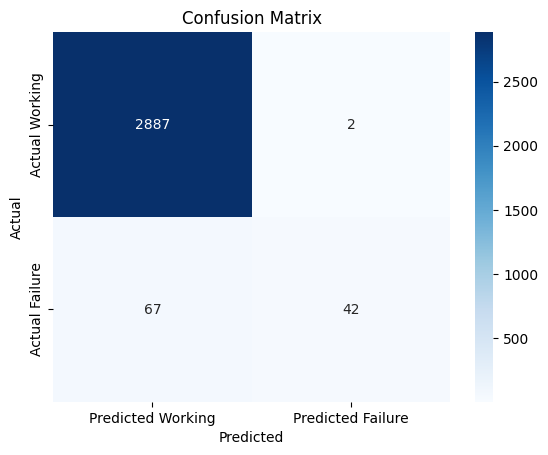

In [215]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize and train the model
model_RandomForestClassifier = RandomForestClassifier(class_weight='balanced', random_state=42)
model_RandomForestClassifier.fit(x_train, y_train)

# Predictions
y_probs = model_RandomForestClassifier.predict_proba(x_test)[:, 1]
y_pred = model_RandomForestClassifier.predict(x_test)

# Evaluation
print(classification_report(y_test, y_pred))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_probs):.4f}")
precision, recall, _ = precision_recall_curve(y_test, y_probs)
print(f"Precision-Recall AUC Score: {auc(recall, precision):.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_score = calculate_CM_score(cm)
model_scores.append(["RandomForestClassifier.", cm_score])


# Visualize the Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Working', 'Predicted Failure'], yticklabels=['Actual Working', 'Actual Failure'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()



RandomForestClassifier with Class Weight Adjustment (Auto)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2889
           1       0.50      0.60      0.55       109

    accuracy                           0.96      2998
   macro avg       0.74      0.79      0.76      2998
weighted avg       0.97      0.96      0.97      2998

ROC-AUC Score: 0.9567
Precision-Recall AUC Score: 0.6070
confusion matrix score: 0.9365


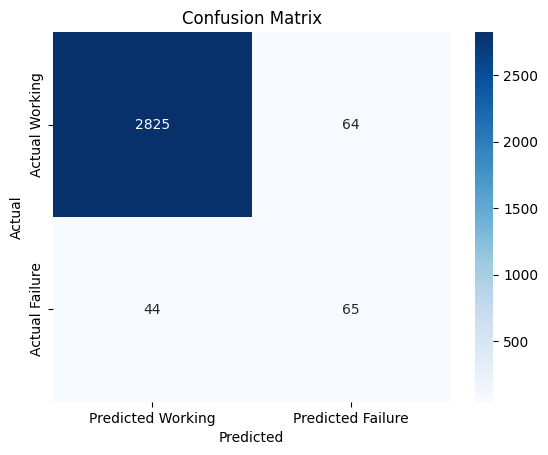

In [216]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc, confusion_matrix
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

# Initialize and train the model (no class_weight parameter now)
model_RandomForestClassifier = RandomForestClassifier(random_state=42)
model_RandomForestClassifier.fit(x_train_resampled, y_train_resampled)

# Predictions
y_probs = model_RandomForestClassifier.predict_proba(x_test)[:, 1]
y_pred = model_RandomForestClassifier.predict(x_test)

# Evaluation
print(classification_report(y_test, y_pred))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_probs):.4f}")
precision, recall, _ = precision_recall_curve(y_test, y_probs)
print(f"Precision-Recall AUC Score: {auc(recall, precision):.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_score = calculate_CM_score(cm)
model_scores.append(["RandomForestClassifier with Class Weight Adjustment (Auto).", cm_score])
# Visualize the Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Working', 'Predicted Failure'], yticklabels=['Actual Working', 'Actual Failure'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()



RandomForestClassifier with Combining Oversampling and Undersampling

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      2889
           1       0.39      0.70      0.50       109

    accuracy                           0.95      2998
   macro avg       0.69      0.83      0.73      2998
weighted avg       0.97      0.95      0.96      2998

ROC-AUC Score: 0.9542
Precision-Recall AUC Score: 0.5212
confusion matrix score: 0.9282


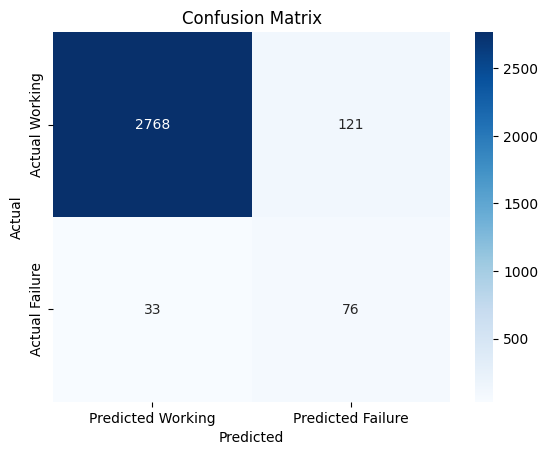

In [217]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc, confusion_matrix
from imblearn.combine import SMOTEENN
import seaborn as sns
import matplotlib.pyplot as plt

# Apply SMOTEENN to combine oversampling and undersampling
smote_enn = SMOTEENN(random_state=42)
x_train_resampled, y_train_resampled = smote_enn.fit_resample(x_train, y_train)

# Initialize and train the model
model_RandomForestClassifier = RandomForestClassifier(random_state=42)
model_RandomForestClassifier.fit(x_train_resampled, y_train_resampled)

# Predictions
y_probs = model_RandomForestClassifier.predict_proba(x_test)[:, 1]
y_pred = model_RandomForestClassifier.predict(x_test)

# Evaluation
print(classification_report(y_test, y_pred))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_probs):.4f}")
precision, recall, _ = precision_recall_curve(y_test, y_probs)
print(f"Precision-Recall AUC Score: {auc(recall, precision):.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_score = calculate_CM_score(cm)
model_scores.append(["RandomForestClassifier with Combining Oversampling and Undersampling.", cm_score])

# Visualize the Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Working', 'Predicted Failure'], yticklabels=['Actual Working', 'Actual Failure'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


CatBoostClassifier with Class Weight Adjustment

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2889
           1       0.47      0.81      0.60       109

    accuracy                           0.96      2998
   macro avg       0.73      0.89      0.79      2998
weighted avg       0.97      0.96      0.97      2998

ROC-AUC Score: 0.9580
Precision-Recall AUC Score: 0.7162
confusion matrix score: 0.9470


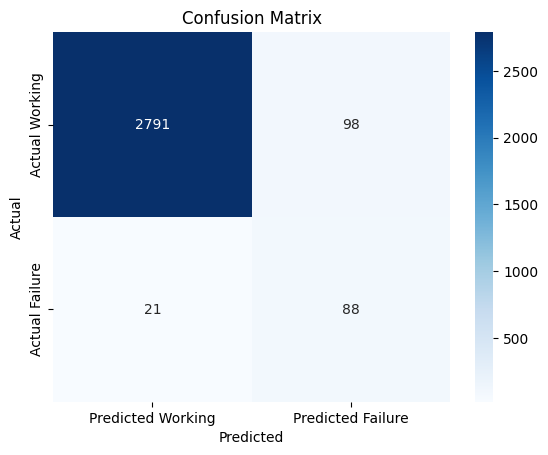

In [218]:

from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize and train the CatBoost model with class weights
class_weights = [1, 97]  # Adjust these weights based on your class imbalance ratio
model_CatBoostClassifier = CatBoostClassifier(class_weights=class_weights, random_state=42, verbose=0)
model_CatBoostClassifier.fit(x_train, y_train)

# Predictions
y_probs = model_CatBoostClassifier.predict_proba(x_test)[:, 1]
y_pred = model_CatBoostClassifier.predict(x_test)

# Evaluation
print(classification_report(y_test, y_pred))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_probs):.4f}")
precision, recall, _ = precision_recall_curve(y_test, y_probs)
print(f"Precision-Recall AUC Score: {auc(recall, precision):.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_score = calculate_CM_score(cm)
model_scores.append(["CatBoostClassifier with Class Weight Adjustment.", cm_score])
# Visualize the Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Working', 'Predicted Failure'], yticklabels=['Actual Working', 'Actual Failure'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


CatBoostClassifier Combining Oversampling and Undersampling

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      2889
           1       0.39      0.78      0.52       109

    accuracy                           0.95      2998
   macro avg       0.69      0.87      0.75      2998
weighted avg       0.97      0.95      0.96      2998

ROC-AUC Score: 0.9552
Precision-Recall AUC Score: 0.5930
confusion matrix score: 0.9330


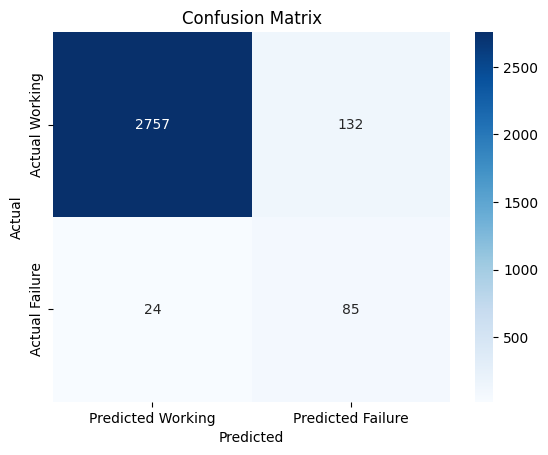

In [219]:

from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc, confusion_matrix
from imblearn.combine import SMOTEENN
import seaborn as sns
import matplotlib.pyplot as plt

# Apply SMOTEENN to combine oversampling and undersampling
smote_enn = SMOTEENN(random_state=42)
x_train_resampled, y_train_resampled = smote_enn.fit_resample(x_train, y_train)

# Initialize and train the CatBoost model
model_CatBoostClassifier = CatBoostClassifier(random_state=42, verbose=0)
model_CatBoostClassifier.fit(x_train_resampled, y_train_resampled)

# Predictions
y_probs = model_CatBoostClassifier.predict_proba(x_test)[:, 1]
y_pred = model_CatBoostClassifier.predict(x_test)

# Evaluation
print(classification_report(y_test, y_pred))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_probs):.4f}")
precision, recall, _ = precision_recall_curve(y_test, y_probs)
print(f"Precision-Recall AUC Score: {auc(recall, precision):.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_score = calculate_CM_score(cm)
model_scores.append(["CatBoostClassifier Combining Oversampling and Undersampling.", cm_score])

# Visualize the Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Working', 'Predicted Failure'], yticklabels=['Actual Working', 'Actual Failure'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


Neural network model

Epoch 1/50


/home/ibrahim/Desktop/BigProject/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


640/640 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9543 - loss: 0.2281 - val_accuracy: 0.9681 - val_loss: 0.1144
Epoch 2/50
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 928us/step - accuracy: 0.9691 - loss: 0.1012 - val_accuracy: 0.9631 - val_loss: 0.1106
Epoch 3/50
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 908us/step - accuracy: 0.9709 - loss: 0.0832 - val_accuracy: 0.9675 - val_loss: 0.0997
Epoch 4/50
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 942us/step - accuracy: 0.9719 - loss: 0.0833 - val_accuracy: 0.9637 - val_loss: 0.1017
Epoch 5/50
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9712 - loss: 0.0842 - val_accuracy: 0.9681 - val_loss: 0.0985
Epoch 6/50
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9741 - loss: 0.0753 - val_accuracy: 0.9681 - val_loss: 0.0955
Epoch 7/50
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9737 - loss: 0.0815 - val_accuracy: 0.9662 - val_loss: 0.1032
Epoch 8/50
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9749 - loss: 0.0757 - val_accuracy: 0.9694 

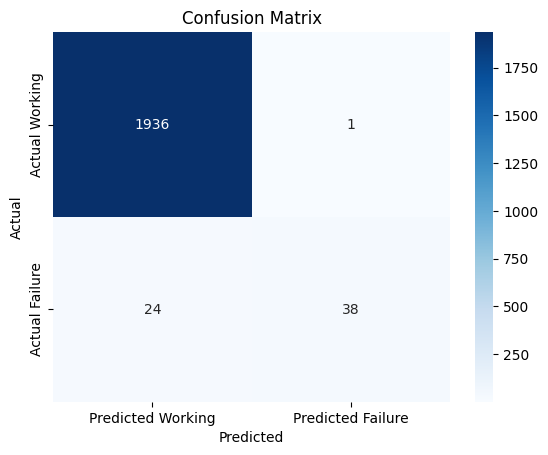

In [220]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import seaborn as sns
import matplotlib.pyplot as plt

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Building the neural network model
model_NN = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),  # First hidden layer
    Dense(32, activation='relu'),  # Second hidden layer
    Dense(1, activation='sigmoid')  # Output layer
])

# Compiling the model
model_NN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
model_NN.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2)

# Evaluating the model
loss, accuracy = model_NN.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")
    
# Making predictions
y_probs = model_NN.predict(X_test).flatten()  # Predict probabilities
y_pred = (y_probs > 0.5).astype(int)  # Convert probabilities to binary predictions

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate and print ROC-AUC
roc_auc = roc_auc_score(y_test, y_probs)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_probs)
pr_auc = auc(recall, precision)
print(f"Precision-Recall AUC Score: {pr_auc:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_score = calculate_CM_score(cm)
model_scores.append(["Neural network model", cm_score])

# Visualize the Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Working', 'Predicted Failure'], yticklabels=['Actual Working', 'Actual Failure'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


Neural network model with Resampling

Epoch 1/50


/home/ibrahim/Desktop/BigProject/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1234/1234 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8118 - loss: 0.3985 - val_accuracy: 0.8619 - val_loss: 0.3106
Epoch 2/50
1234/1234 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9091 - loss: 0.2300 - val_accuracy: 0.8878 - val_loss: 0.3016
Epoch 3/50
1234/1234 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9177 - loss: 0.2029 - val_accuracy: 0.9319 - val_loss: 0.1896
Epoch 4/50
1234/1234 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9294 - loss: 0.1787 - val_accuracy: 0.9316 - val_loss: 0.2046
Epoch 5/50
1234/1234 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9343 - loss: 0.1697 - val_accuracy: 0.8940 - val_loss: 0.2722
Epoch 6/50
1234/1234 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9364 - loss: 0.1686 - val_accuracy: 0.9229 - val_loss: 0.2472
Epoch 7/50
1234/1234 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9435 - loss: 0.1484 - val_accuracy: 0.9147 - val_loss: 0.2394
Epoch 8/50
1234/1234 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9435 - loss: 0.1406 - val_accurac

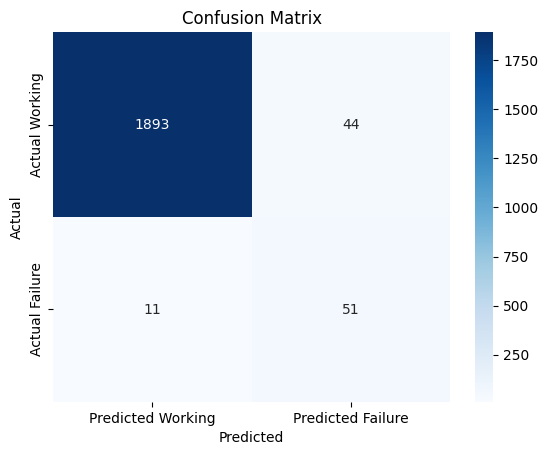

In [221]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Resampling with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_resampled), y=y_resampled)
class_weight_dict = dict(enumerate(class_weights))

# Building the neural network model
model_NN_with_Smote = Sequential([
    Dense(64, input_dim=X_resampled.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compiling the model
model_NN_with_Smote.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model with class weights
history = model_NN_with_Smote.fit(X_resampled, y_resampled, epochs=50, batch_size=10, validation_split=0.2, class_weight=class_weight_dict)

# Making predictions
y_probs = model_NN_with_Smote.predict(X_test).flatten()  # Predict probabilities
y_pred = (y_probs > 0.5).astype(int)  # Convert probabilities to binary predictions

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate and print ROC-AUC
roc_auc = roc_auc_score(y_test, y_probs)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_probs)
pr_auc = auc(recall, precision)
print(f"Precision-Recall AUC Score: {pr_auc:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

cm_score = calculate_CM_score(cm)
model_scores.append(["Neural network model with Resampling", cm_score])
# Visualize the Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Working', 'Predicted Failure'], yticklabels=['Actual Working', 'Actual Failure'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()



Neural network model using Dropout(0.5) to reduce overfitting and Early Stopping.

Epoch 1/50


/home/ibrahim/Desktop/BigProject/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1234/1234 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7078 - loss: 0.5684 - val_accuracy: 0.8305 - val_loss: 0.4178
Epoch 2/50
1234/1234 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8418 - loss: 0.3669 - val_accuracy: 0.8467 - val_loss: 0.3698
Epoch 3/50
1234/1234 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8706 - loss: 0.3124 - val_accuracy: 0.8441 - val_loss: 0.3371
Epoch 4/50
1234/1234 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8726 - loss: 0.3022 - val_accuracy: 0.8509 - val_loss: 0.3341
Epoch 5/50
1234/1234 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8888 - loss: 0.2834 - val_accuracy: 0.8632 - val_loss: 0.2805
Epoch 6/50
1234/1234 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8947 - loss: 0.2611 - val_accuracy: 0.8648 - val_loss: 0.2851
Epoch 7/50
1234/1234 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9000 - loss: 0.2570 - val_accuracy: 0.8736 - val_loss: 0.2497
Epoch 8/50
1234/1234 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9032 - loss: 0.2437 - val_accurac

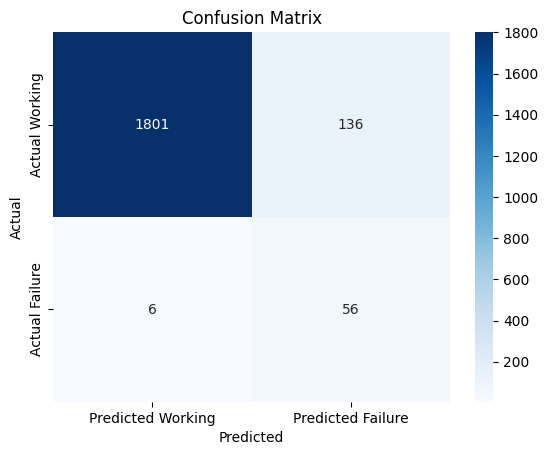

In [222]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Resampling with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_resampled), y=y_resampled)
class_weight_dict = dict(enumerate(class_weights))

# Building the neural network model with Dropout for regularization
model_NN_with_Smote = Sequential([
    Dense(64, input_dim=X_resampled.shape[1], activation='relu'),
    Dropout(0.5),  # Regularization
    Dense(32, activation='relu'),
    Dropout(0.5),  # Regularization
    Dense(1, activation='sigmoid')
])

# Compiling the model
model_NN_with_Smote.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Training the model with class weights
history = model_NN_with_Smote.fit(
    X_resampled, y_resampled, 
    epochs=50, 
    batch_size=10, 
    validation_split=0.2, 
    class_weight=class_weight_dict,
    callbacks=[early_stopping]
)

# Making predictions
y_probs = model_NN_with_Smote.predict(X_test).flatten()  # Predict probabilities
y_pred = (y_probs > 0.5).astype(int)  # Convert probabilities to binary predictions

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate and print ROC-AUC
roc_auc = roc_auc_score(y_test, y_probs)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_probs)
pr_auc = auc(recall, precision)
print(f"Precision-Recall AUC Score: {pr_auc:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

cm_score = calculate_CM_score(cm)
model_scores.append(["Neural network model with Dropout, Early Stopping.", cm_score])

# Visualize the Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Working', 'Predicted Failure'], yticklabels=['Actual Working', 'Actual Failure'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()



In [223]:
#print(model_scores)
mm = []
mm.append(["Gradient Boosting Classifier.", 23])
print(model_scores)

[['Gradient Boosting Classifier.', 0.9272967614011897], ['RandomForestClassifier.', 0.9351851851851852], ['RandomForestClassifier with Class Weight Adjustment (Auto).', 0.9364873622812703], ['RandomForestClassifier with Combining Oversampling and Undersampling.', 0.9281984334203656], ['CatBoostClassifier with Class Weight Adjustment.', 0.9470394736842105], ['CatBoostClassifier Combining Oversampling and Undersampling.', 0.933026920551543], ['Neural network model', 0.9643380556912555], ['Neural network model with Resampling', 0.9619000494804553], ['Neural network model with Dropout, Early Stopping.', 0.9234211834908006]]


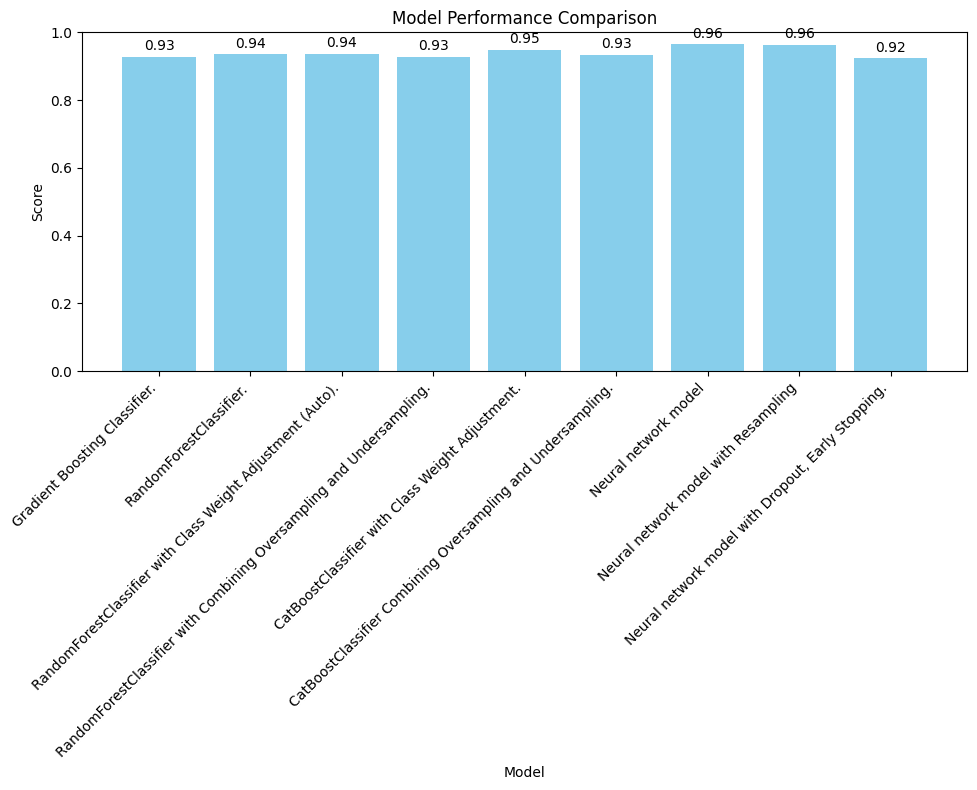

In [227]:
import matplotlib.pyplot as plt

def plot_model_scores(model_scores):
    # Extract model names and scores from the input list
    models = [model[0] for model in model_scores]
    scores = [model[1] for model in model_scores]

    # Create a bar chart
    plt.figure(figsize=(10, 8))
    plt.bar(models, scores, color='skyblue')

    # Add labels and title
    plt.xlabel('Model')
    plt.ylabel('Score')
    plt.title('Model Performance Comparison')
    plt.ylim(0, 1)  # Assuming scores are between 0 and 1
    
    # Rotate x-axis labels to avoid overlap
    plt.xticks(rotation=45, ha='right')

    # Display the score values on top of the bars
    for i, score in enumerate(scores):
        plt.text(i, score + 0.02, f'{score:.2f}', ha='center')

    # Show the plot
    plt.tight_layout()  # Adjust layout to fit rotated labels
    plt.show()


plot_model_scores(model_scores)
